In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv

tabular_df = pd.read_csv('data/train&val/train.csv')
test_df = pd.read_csv('data/test/test.csv')
tabular_df.head()
mean_columns = ['X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean']

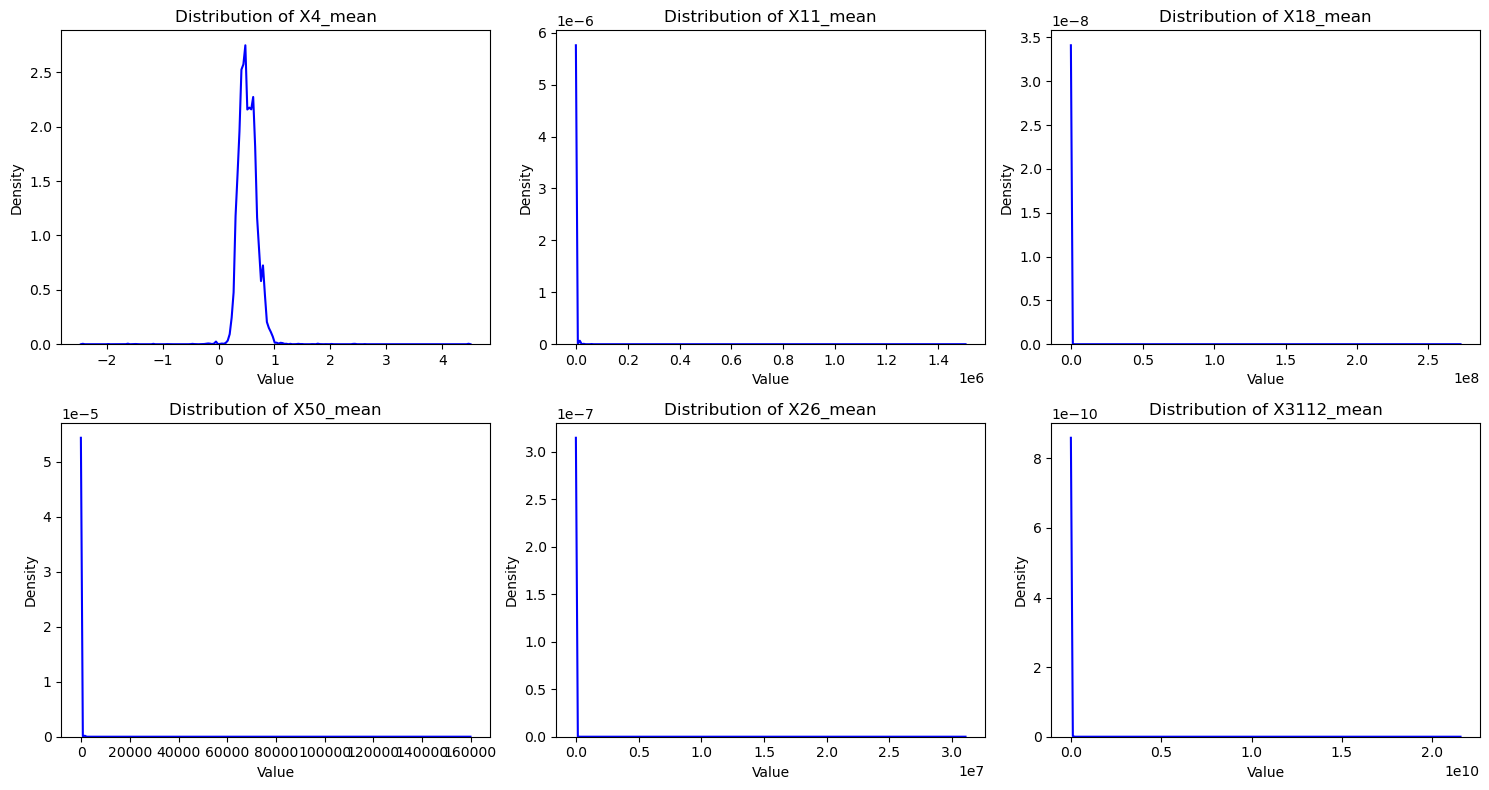

In [9]:
def plot_data(df):
    plt.figure(figsize=(15, 8))

    # Setting up a grid of plots with 2 columns
    n_cols = 3
    n_rows = 2

    for i, col in enumerate(mean_columns):
        plt.subplot(n_rows, n_cols, i+1)
        sns.kdeplot(df[col], bw_adjust=0.5, fill=False, color='blue')
        plt.title(f'Distribution of {col}')
        plt.xlabel('Value')
        plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

plot_data(tabular_df)

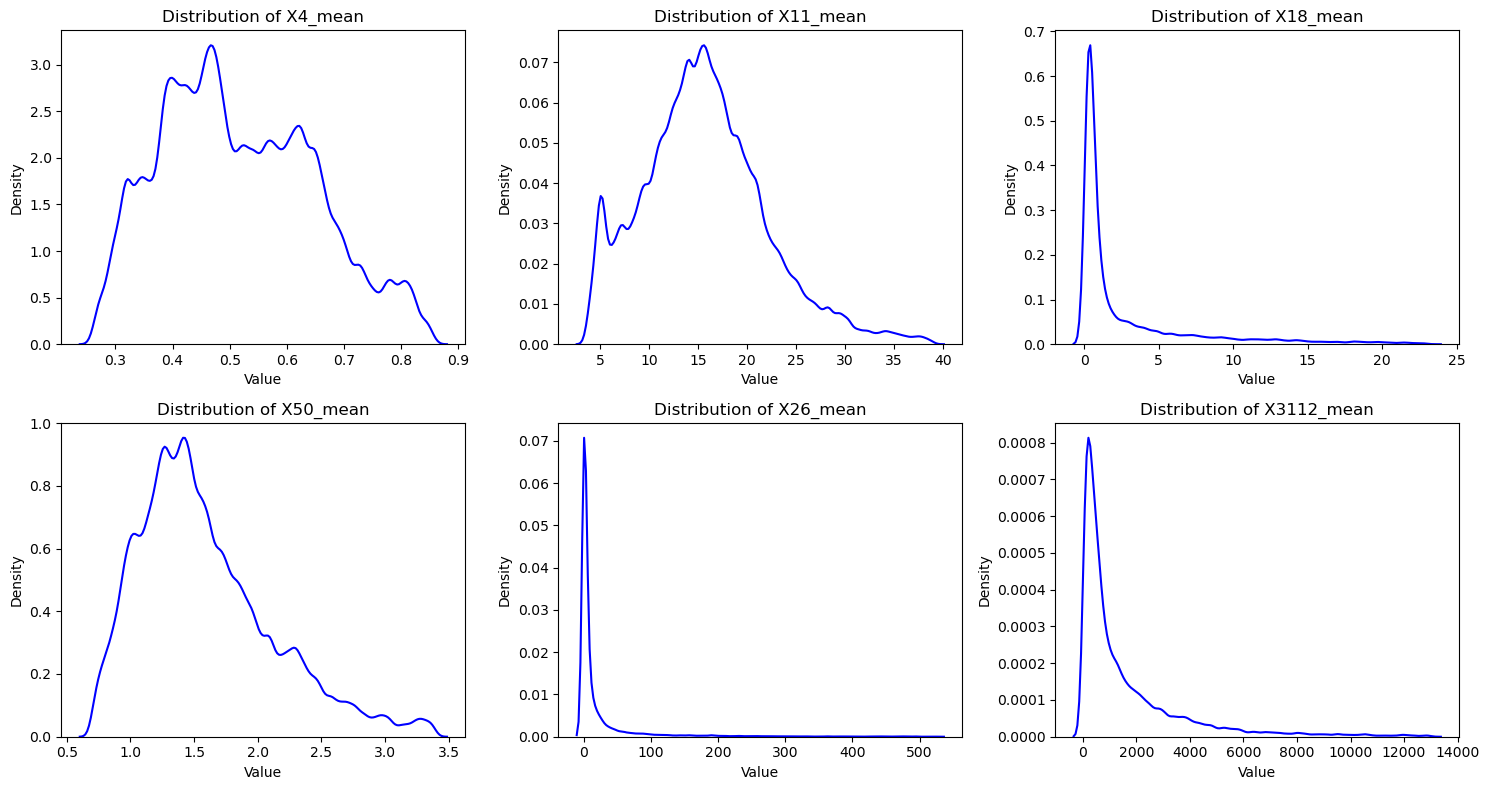

In [10]:
for column in mean_columns:
    upper_quantile = tabular_df[column].quantile(0.98)
    lower_quantile = tabular_df[column].quantile(0.02)  
    tabular_df = tabular_df[(tabular_df[column] < upper_quantile)]
    tabular_df = tabular_df[(tabular_df[column] > lower_quantile)]  
plot_data(tabular_df)

In [6]:
import os
from shutil import copy, rmtree
import random
from tqdm import tqdm
import pandas as pd

def mk_file(file_path: str):
    if os.path.exists(file_path):
        # 如果文件夹存在，则先删除原文件夹在重新创建
        rmtree(file_path)
    os.makedirs(file_path)


def split_data():
    # 保证随机可复现
    random.seed(0)

    # 将数据集中10%的数据划分到验证集中
    split_rate = 0.1

    data_root = os.path.join(os.getcwd(), "data", "train&val")
    img_dir = os.path.join(data_root, "train_images")
    tabular_path = os.path.join(data_root, "train.csv")
    assert os.path.exists(img_dir), "path '{}' does not exist.".format(img_dir)

    # 建立保存训练集的文件夹
    train_root = os.path.join(os.getcwd(), "data", "train")
    mk_file(train_root)
    train_img_dir = os.path.join(train_root, "train_images")
    mk_file(train_img_dir)
    train_csv_path = os.path.join(train_root, "train.csv")

    # 建立保存验证集的文件夹
    val_root = os.path.join(os.getcwd(), "data", "validate")
    mk_file(val_root)
    val_img_dir = os.path.join(val_root, "val_images")
    mk_file(val_img_dir)
    val_csv_path = os.path.join(val_root, "val.csv")

    images = os.listdir(img_dir)
    train_df = pd.DataFrame(columns=tabular_df.columns)
    train_df["path"] = []
    train_df.to_csv(train_csv_path, header=True, index=False)
    val_df = pd.DataFrame(columns=tabular_df.columns)
    val_df["path"] = []
    val_df.to_csv(val_csv_path, header=True, index=False)
    num = len(tabular_df)
    # 随机采样验证集的索引
    imgid_list = tabular_df['id'].tolist()
    eval_index = random.sample(imgid_list, k=int(num * split_rate))
    images = os.listdir(img_dir)
    for index, img_id in tqdm(enumerate(imgid_list), total=len(imgid_list)):
        img_name = str(img_id) + ".jpeg"
        image_path = os.path.join(img_dir, img_name)
        if img_id in eval_index:
            # 将分配至验证集中的文件复制到相应目录
            copy(image_path, val_img_dir)
            sgl_row_df = tabular_df[tabular_df["id"] == int(img_id)].copy()
            sgl_row_df["path"] = [os.path.join(val_img_dir, img_name)]
            sgl_row_df.to_csv(val_csv_path, mode="a", header=False, index=False)
        else:
            # 将分配至训练集中的文件复制到相应目录
            copy(image_path, train_img_dir)
            sgl_row_df = tabular_df[tabular_df["id"] == int(img_id)].copy()
            sgl_row_df["path"] = [os.path.join(train_img_dir, img_name)]
            sgl_row_df.to_csv(train_csv_path, mode="a", header=False, index=False)

    print("processing done!")
split_data()

100%|██████████| 33961/33961 [02:09<00:00, 262.62it/s]

processing done!


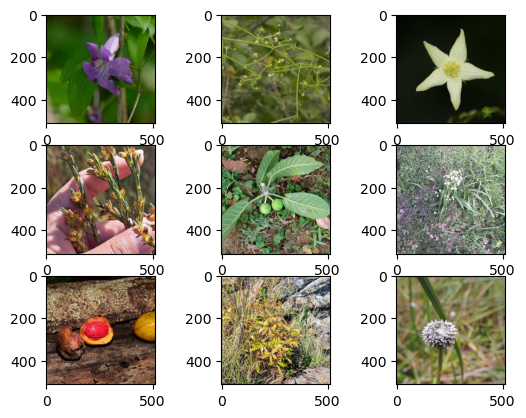

In [22]:
_,axs = plt.subplots(3,3)
data = pd.read_csv('data/train/train.csv')
for i in range(3):
    for j in range(3):
        ax = axs[i,j]

        cnt = (i*3+j)
        img =  cv.imread(data.iloc[cnt,-1])
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        ax.imshow(img)

In [9]:
test_img_dir = os.path.join(os.getcwd(), "data", "test", "test_images")
test_images = os.listdir(test_img_dir)
for image in test_images:
    raw_img_name, _ = os.path.splitext(image)
    imgPath = os.path.join(test_img_dir, image)
    test_df.loc[test_df["id"] == int(raw_img_name),"path"] = imgPath
test_df.to_csv("data/test/test.csv", mode="w", header=True, index=False)
test_df.head()

,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,...,VOD_X_1997_2018_multiyear_mean_m04,VOD_X_1997_2018_multiyear_mean_m05,VOD_X_1997_2018_multiyear_mean_m06,VOD_X_1997_2018_multiyear_mean_m07,VOD_X_1997_2018_multiyear_mean_m08,VOD_X_1997_2018_multiyear_mean_m09,VOD_X_1997_2018_multiyear_mean_m10,VOD_X_1997_2018_multiyear_mean_m11,VOD_X_1997_2018_multiyear_mean_m12,path
0,201238668,8.086756,2246.500000,127.321426,20.423418,353.381042,17.535713,80,109,90,...,0.389460,0.387536,0.374910,0.363712,0.364623,0.379435,0.388294,0.398887,0.397853,e:\other_projects\PlantTraits2024_xia\data\tes...
1,202310319,10.844286,495.871429,28.023809,18.738306,786.554382,29.292856,130,155,142,...,0.300813,0.332776,0.314386,0.291168,0.280947,0.277623,0.276503,0.271212,0.272672,e:\other_projects\PlantTraits2024_xia\data\tes...
2,202604412,8.105556,378.328583,39.928570,41.885647,722.071167,34.853809,133,134,139,...,0.418509,0.437172,0.453239,0.445230,0.435441,0.432758,0.429839,0.417250,0.394216,e:\other_projects\PlantTraits2024_xia\data\tes...
3,201353439,7.077679,878.785706,70.428574,37.045235,669.389343,25.150000,103,140,116,...,0.313667,0.352311,0.401131,0.513455,0.519174,0.474007,0.469071,0.408466,0.366724,e:\other_projects\PlantTraits2024_xia\data\tes...
4,195351745,4.790555,2299.366699,150.199997,24.136568,462.887695,22.516666,85,114,98,...,0.506952,0.462181,0.397052,0.358262,0.369279,0.414420,0.469002,0.519534,0.521837,e:\other_projects\PlantTraits2024_xia\data\tes...
